<a href="https://colab.research.google.com/github/srv96/AI-ML-TensorFlow/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist;

(X_train, y_train) , (X_test, y_test) = fashion_mnist.load_data();
X_train , X_test = X_train / 255.0 , X_test / 255.0
print("X_train.shape : ",X_train.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train.shape :  (60000, 28, 28)


In [6]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print ("X_train.shape : ", X_train.shape)

X_train.shape :  (60000, 28, 28, 1)


In [7]:
K = len(set(y_train))
print("number of classes : " , K)

number of classes :  10


In [10]:
i = tf.keras.layers.Input(shape=X_train[0].shape)
x = tf.keras.layers.Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = tf.keras.layers.Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(K, activation='softmax')(x)

model = tf.keras.Model(i, x)

In [11]:
model.compile(
    optimizer ='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [13]:
r = model.fit(
    X_train, y_train,
    validation_data = (X_test , y_test),
    epochs = 15
  )

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.7491 - loss: 0.6932 - val_accuracy: 0.8437 - val_loss: 0.4082
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 19ms/step - accuracy: 0.8605 - loss: 0.3774 - val_accuracy: 0.8679 - val_loss: 0.3584
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.8806 - loss: 0.3162 - val_accuracy: 0.8756 - val_loss: 0.3394
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 17ms/step - accuracy: 0.8934 - loss: 0.2821 - val_accuracy: 0.8872 - val_loss: 0.3124
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 0.9046 - loss: 0.2550 - val_accuracy: 0.8909 - val_loss: 0.3020
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 20ms/step - accuracy: 0.9116 - loss: 0.2306 - val_accuracy: 0.8938 - val_loss: 0.3038
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.9204 - loss: 0.2074 - val_accuracy: 0.8970 - val_loss: 0.2947
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.9251 -

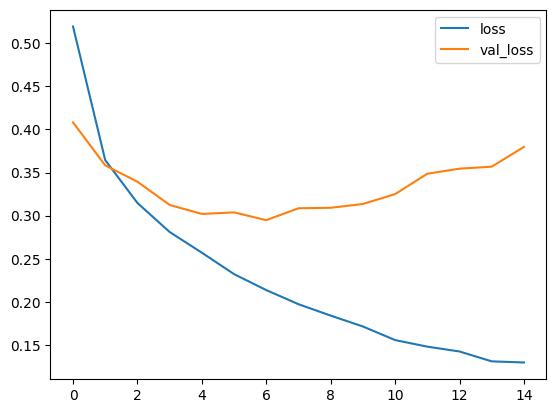

In [14]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

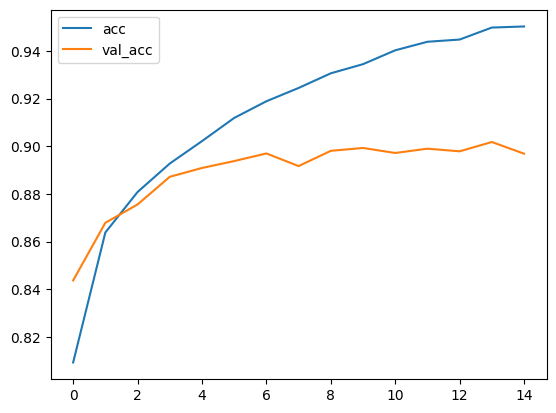

In [15]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Confusion matrix, without normalization
[[847   0  23  16   4   0  99   0  11   0]
 [  3 973   2  14   2   0   5   0   1   0]
 [ 14   1 844  11  59   0  70   0   1   0]
 [ 16   6  23 888  33   0  32   0   2   0]
 [  1   0  66  20 861   0  52   0   0   0]
 [  0   0   1   1   0 990   0   5   0   3]
 [101   1  56  24 131   1 673   0  13   0]
 [  0   0   0   0   0  24   0 957   0  19]
 [  3   0   2   3   6   1   6   2 977   0]
 [  0   0   0   0   0  10   1  30   0 959]]


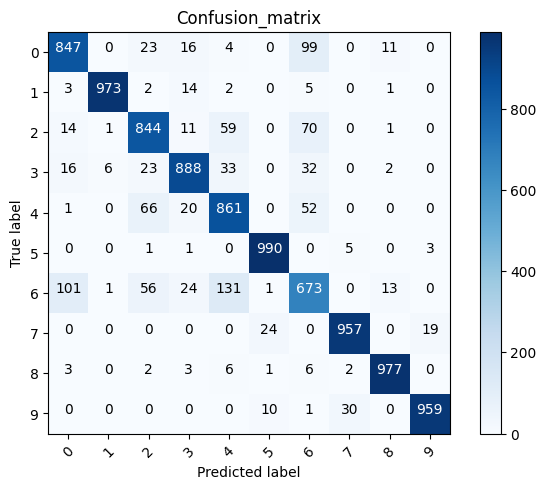

In [16]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion_matrix',
                          cmap=plt.cm.Blues):
    if normalize:
      cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
      print("Normalized confusion matrix")
    else:
      print("Confusion matrix, without normalization")
    print(cm)
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
      plt.text(j,i,format(cm[i,j],fmt),
              horizontalalignment="center",
              color="white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

In [17]:
label = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split('\n')

Text(0.5, 1.0, 'True label: Shirt Predicted: Coat')

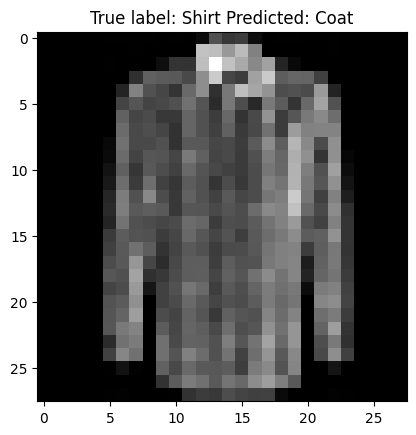

In [20]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (label[y_test[i]],label[p_test[i]]))